In [1]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The above dataset contains 614 rows and 13 columns. In the above 13 columns, 12 columns has input variables and one column(Loan Status) is an output variable/Target

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In the above dataset, there are three types of data(int, float and object)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

From the above dataset, we can see that there are some null values present in most of the columns.

In [8]:
#Lets replace the null values with mean in columns LoanAmount, Loan_Amount_Term, Credit_History

np.mean(df["LoanAmount"])



146.41216216216216

In [9]:
np.mean(df["Loan_Amount_Term"])

342.0

In [10]:
np.mean(df["Credit_History"])

0.8421985815602837

In [11]:
#Filling the null values with the mean of those columns

df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [12]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())

In [13]:
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())

In [14]:
#Lets replace the null values with mode in columns Gender, Married, Depedents,Self_Employed

from scipy import stats

x = stats.mode("Gender")
print(x)

ModeResult(mode=array(['Gender'], dtype='<U6'), count=array([1]))


In [15]:
y = stats.mode("Married")
print(y)

ModeResult(mode=array(['Married'], dtype='<U7'), count=array([1]))


In [16]:
z = stats.mode("Dependents")
print(z)

ModeResult(mode=array(['Dependents'], dtype='<U10'), count=array([1]))


In [17]:
p = stats.mode("Self_Employed")
print(p)

ModeResult(mode=array(['Self_Employed'], dtype='<U13'), count=array([1]))


In [18]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [19]:
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

In [20]:
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

In [21]:
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

From the above data, it says that all the null values are removed.

In [23]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.

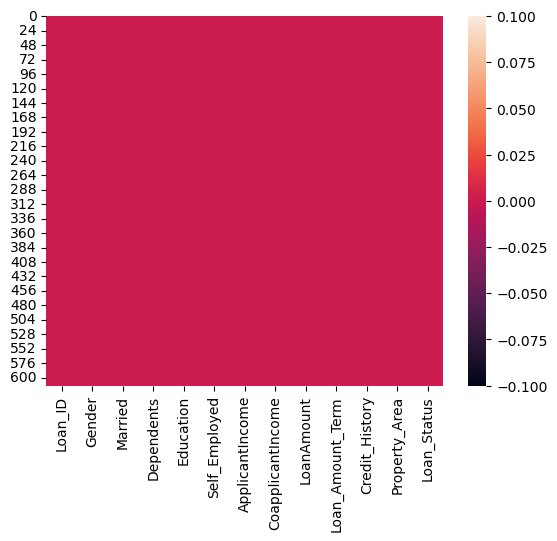

In [24]:
#Lets Visualize using heatmap

sns.heatmap(df.isnull())

plt.show()

In [25]:
#Decription of dataset

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [26]:
#Dropping of columns which are not affecting to Target. As Loan_ID is not contributing to target, we will drop the column.

df = df.drop("Loan_ID",axis=1)

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [28]:
#We need to convert object datatypes to int as the machine can perform learning only on numeric values using encoding techniques.

import sklearn
from sklearn.preprocessing import LabelEncoder


In [29]:
le = LabelEncoder()

#Encoding Gender Column

df['Gender']= le.fit_transform(df['Gender'])

In [30]:
#Encoding Married Column

df['Married']= le.fit_transform(df['Married'])

In [31]:
#Encoding Education Column

df['Education']= le.fit_transform(df['Education'])

In [32]:
#Encoding Dependents Column

df['Dependents']= le.fit_transform(df['Dependents'])

In [33]:
#Encoding Self_Employed Column

df['Self_Employed']= le.fit_transform(df['Self_Employed'])

In [34]:
#Encoding Property_Area Column

df['Property_Area']= le.fit_transform(df['Property_Area'])

In [35]:
import sklearn
from sklearn.preprocessing import OneHotEncoder

One = OneHotEncoder()


In [36]:
#Encoding Loan_Status Column

df['Loan_Status']= le.fit_transform(df['Loan_Status'])

In [37]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [38]:
df.shape

(614, 12)

In [39]:
#Checking for outliers

#Checking for numerical columns

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        numerical_col.append(i)
print("Numerical columns:", numerical_col)

Numerical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


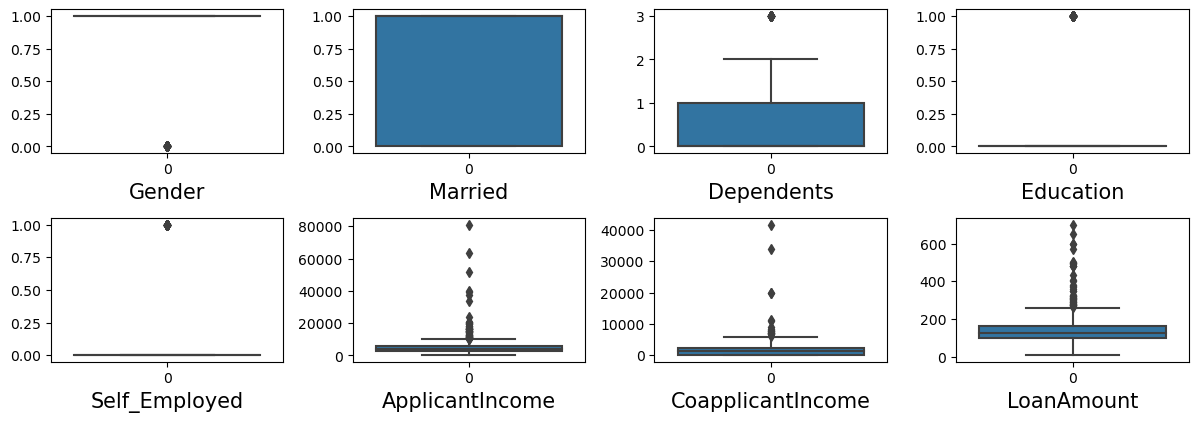

In [40]:
plt.figure(figsize = (12,8), facecolor ='white')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(4,4, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize =15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the above graphs, we can see that there are some outliers present in Gender,Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome and LoanAmount columns. We need to remove outliers

In [41]:
#Removing Outliers using zscore and IQR method
    
from scipy.stats import zscore

In [42]:
out_features = df[['Gender','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount']]
z =np.abs(zscore(out_features))
z

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.472343,0.737806,0.528362,0.392601,0.072991,0.554487,0.000000
1,0.472343,0.253470,0.528362,0.392601,0.134412,0.038732,0.219273
2,0.472343,0.737806,0.528362,2.547117,0.393747,0.554487,0.957641
3,0.472343,0.737806,1.892641,0.392601,0.462062,0.251980,0.314547
4,0.472343,0.737806,0.528362,0.392601,0.097728,0.554487,0.064454
...,...,...,...,...,...,...,...
609,2.117107,0.737806,0.528362,0.392601,0.410130,0.554487,0.898095
610,0.472343,2.236021,0.528362,0.392601,0.212557,0.554487,1.267279
611,0.472343,0.253470,0.528362,0.392601,0.437174,0.472404,1.269371
612,0.472343,1.244745,0.528362,0.392601,0.357064,0.554487,0.483367


In [43]:
np.where(z>3)

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
        333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
        581, 600, 604], dtype=int64),
 array([5, 4, 6, 4, 6, 4, 6, 5, 6, 4, 4, 6, 6, 4, 6, 6, 5, 4, 5, 6, 4, 6,
        6, 6, 6, 6, 5, 5, 6], dtype=int64))

In [44]:
df1 = df[(z<3).all(axis=1)]

In [45]:
df1.shape

(589, 12)

In [46]:
print("First DataFrame -", df.shape[0])
print("New DataFrame -", df1.shape[0])

First DataFrame - 614
New DataFrame - 589


In [47]:
print (" Data Loss percentage after removing outliers with z-score method -", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

 Data Loss percentage after removing outliers with z-score method - 4.071661237785016


In [48]:
#Lets check Data Loss percentage using IQR method

#1st Quantile
Q1 = out_features.quantile(0.25)

#3RD Quantile
Q3 = out_features.quantile(0.75)

#IQR
IQR = Q3 -Q1
df2 = df[~((df<(Q1 -1.5 *IQR))|(df>(Q3 + 1.5 * IQR))).any(axis =1)]

In [49]:
df2.shape

(263, 12)

In [50]:
print (" Data Loss percentage after removing outliers with IQR method -", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

 Data Loss percentage after removing outliers with IQR method - 57.16612377850163


Here Data loss percentage using IQR method is more than 57.16% which is not in acceptable range and zscore is only 4.07% which is affordable.

In [51]:
df=df1

In [52]:
#Checking for skewness in data

df.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term    -2.433130
Credit_History      -1.953298
Property_Area       -0.063183
Loan_Status         -0.828815
dtype: float64

From the above data, we can see that there is no skewness present in the data

In [53]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.374745,0.184580,0.050036,0.000841,0.027728,0.190220,0.151504,-0.084495,0.016096,-0.022807,0.021942
Married,0.374745,1.000000,0.333887,0.015846,-0.004453,-0.006164,0.229956,0.160541,-0.100764,0.012408,0.010586,0.095124
Dependents,0.184580,0.333887,1.000000,0.068588,0.055481,0.078305,-0.033734,0.132731,-0.088304,-0.014654,0.006005,0.021937
Education,0.050036,0.015846,0.068588,1.000000,-0.003507,-0.160966,-0.045701,-0.149281,-0.079807,-0.078559,-0.065623,-0.092852
Self_Employed,0.000841,-0.004453,0.055481,-0.003507,1.000000,0.251370,-0.050266,0.112636,-0.054191,-0.012904,-0.030248,-0.016617
ApplicantIncome,0.027728,-0.006164,0.078305,-0.160966,0.251370,1.000000,-0.218846,0.442882,-0.018914,0.041034,-0.006917,-0.005043
CoapplicantIncome,0.190220,0.229956,-0.033734,-0.045701,-0.050266,-0.218846,1.000000,0.312285,-0.037447,-0.020389,-0.087735,0.044815
LoanAmount,0.151504,0.160541,0.132731,-0.149281,0.112636,0.442882,0.312285,1.000000,0.077280,0.000633,-0.081509,-0.042738
Loan_Amount_Term,-0.084495,-0.100764,-0.088304,-0.079807,-0.054191,-0.018914,-0.037447,0.077280,1.000000,-0.007756,-0.071976,-0.021418
Credit_History,0.016096,0.012408,-0.014654,-0.078559,-0.012904,0.041034,-0.020389,0.000633,-0.007756,1.000000,-0.007020,0.555902


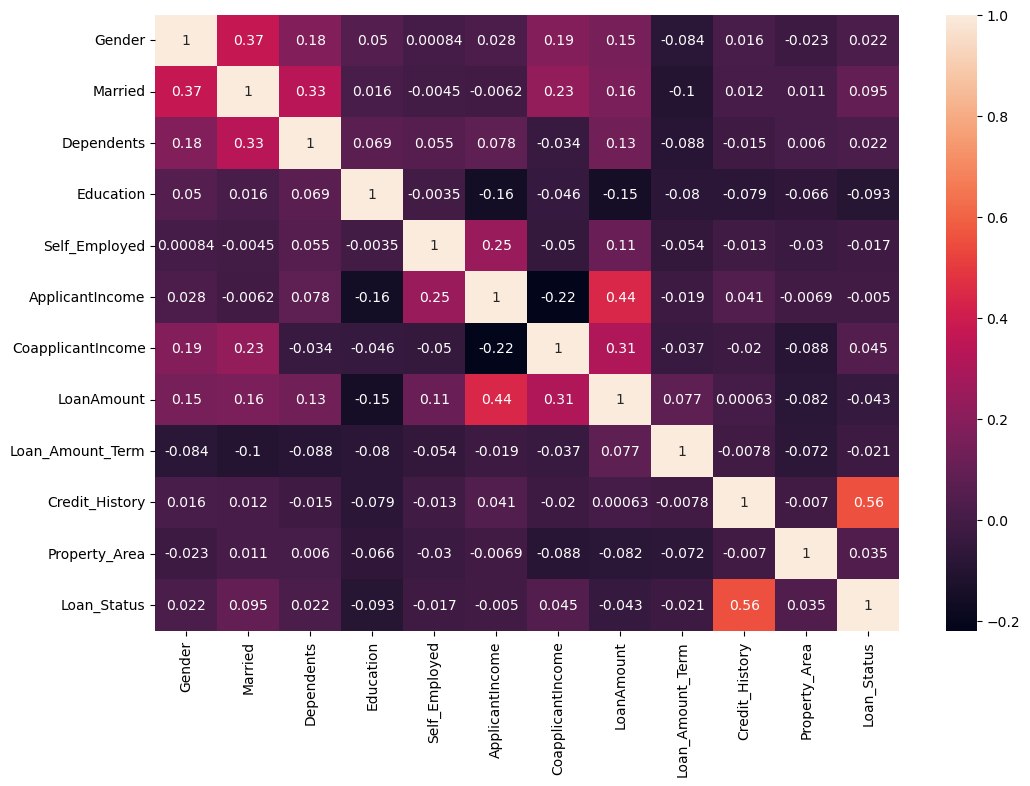

In [54]:
# Visualizing correlation matrix using heatmap
plt.figure(figsize=[12,8])

sns.heatmap(df.corr(),annot =True)
plt.show()

From the above data, we can see that the features are not correlated to each other

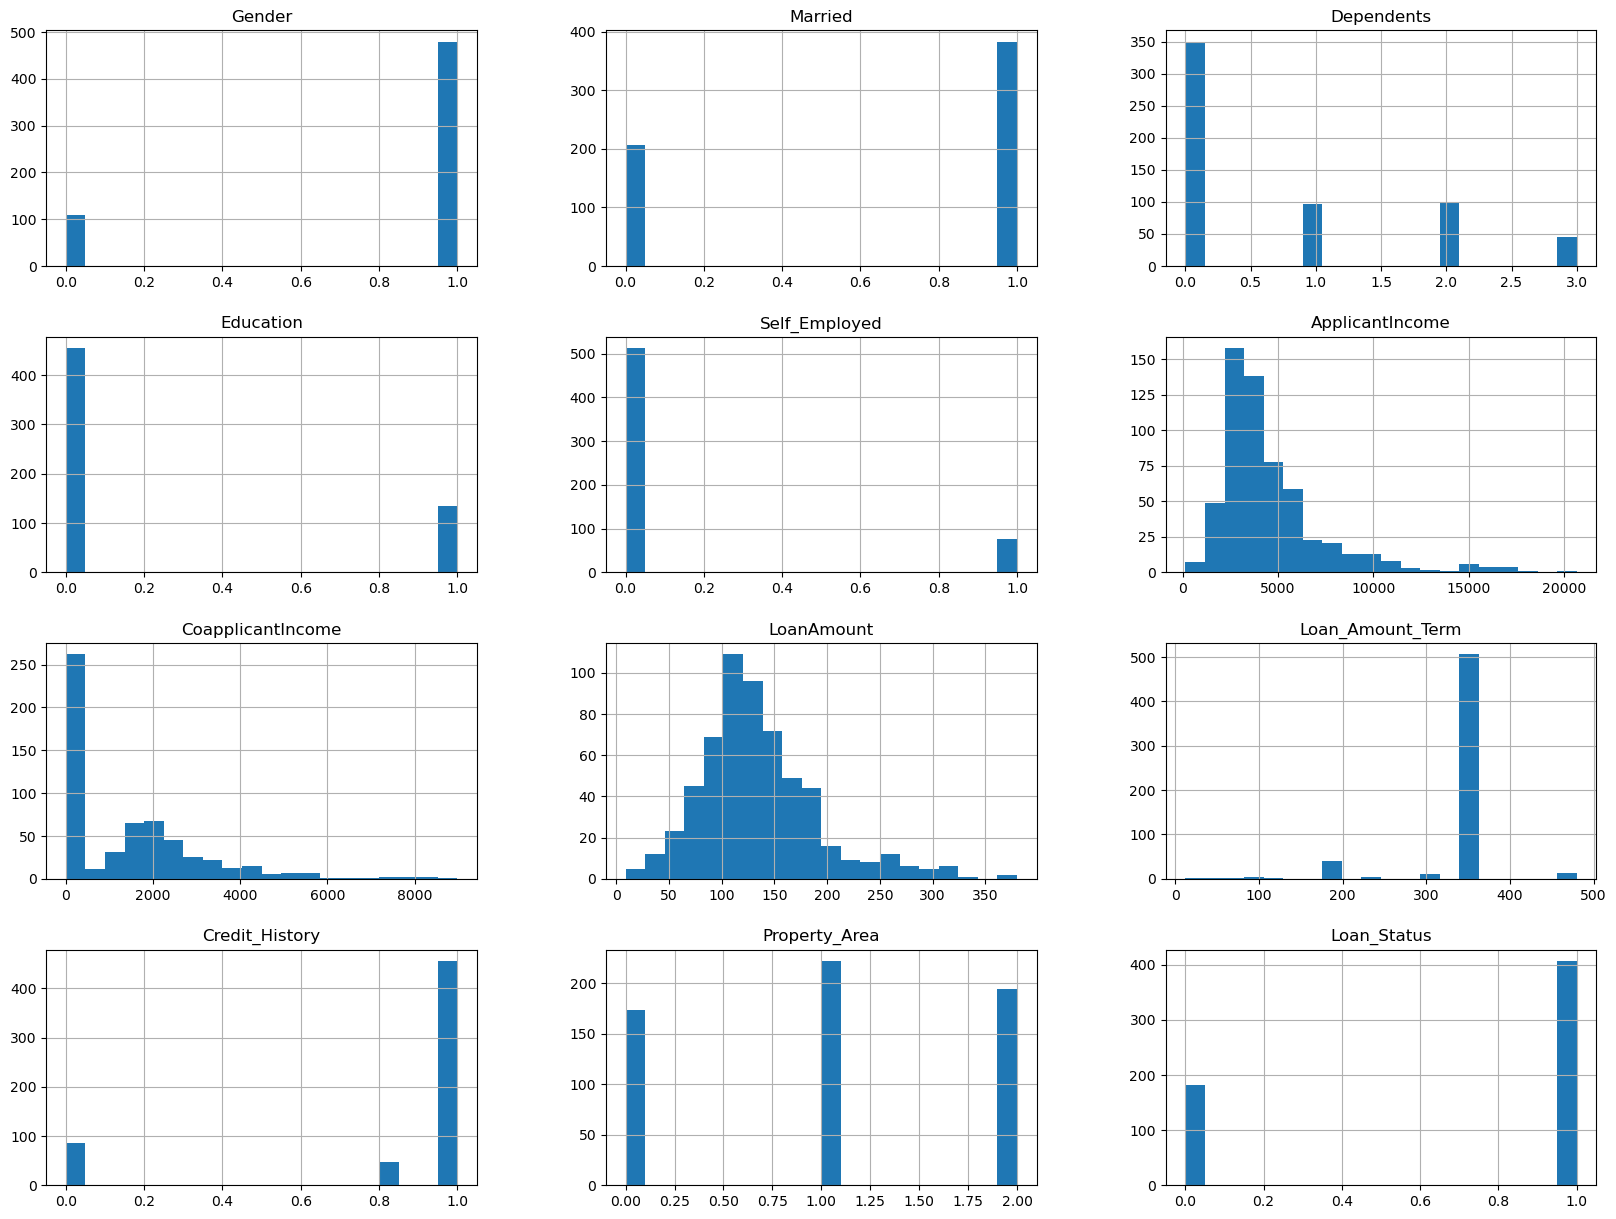

In [55]:
df.hist(bins=20,figsize=(20,15))
plt.show()

In [56]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.814941,0.650255,0.724958,0.227504,0.129032,4649.770798,1415.660306,135.351558,342.050934,0.841398,1.035654,0.691002
std,0.388676,0.477295,0.996118,0.419577,0.335521,2944.018096,1653.363445,56.320095,64.340433,0.350787,0.789225,0.462473
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2873.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3750.000000,1229.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5503.000000,2253.000000,160.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,20667.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


The above data describes the Mean, standard deviation, min, median and max values of a dataset.

1    407
0    182
Name: Loan_Status, dtype: int64


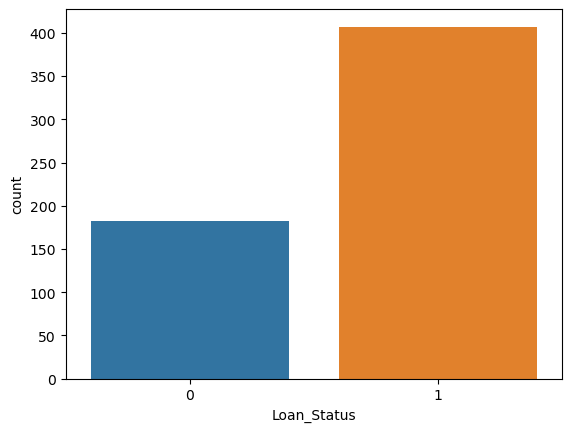

In [57]:
#Step -5, DATA VISUlISATION - It is used to visualize the data in graphs or images which is easily understandable by anyone.

# We can visualize the data of value counts using countplot
sns.countplot(x ='Loan_Status', data =df)
print(df['Loan_Status'].value_counts())

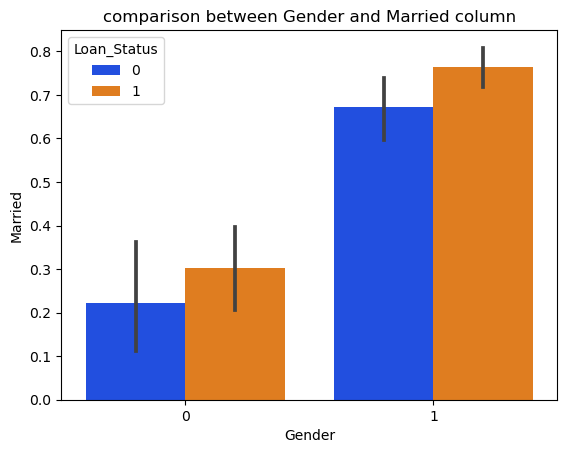

In [58]:
#Comparing Gender and Married column

plt.title("comparison between Gender and Married column")
sns.barplot(x='Gender', y ='Married', data =df, hue = 'Loan_Status', palette ='bright')

plt.show()

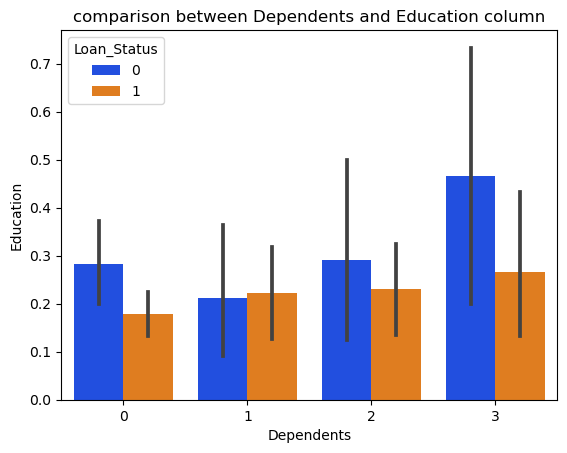

In [59]:
#Comparing Dependants and Education column

plt.title("comparison between Dependents and Education column")
sns.barplot(x='Dependents', y ='Education', data =df, hue = 'Loan_Status', palette ='bright')

plt.show()

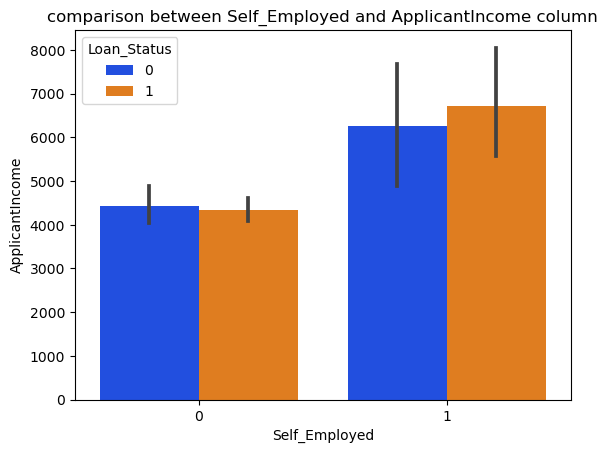

In [60]:
#Comparing Self_Employed and ApplicantIncome column

plt.title("comparison between Self_Employed and ApplicantIncome column")
sns.barplot(x='Self_Employed', y ='ApplicantIncome', data =df, hue = 'Loan_Status', palette ='bright')

plt.show()

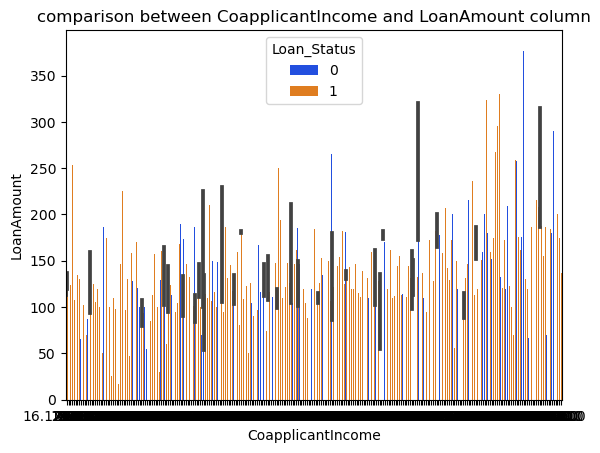

In [61]:
#Comparing CoapplicantIncome and LoanAmount column

plt.title("comparison between CoapplicantIncome and LoanAmount column")
sns.barplot(x='CoapplicantIncome', y ='LoanAmount', data =df, hue = 'Loan_Status', palette ='bright')

plt.show()

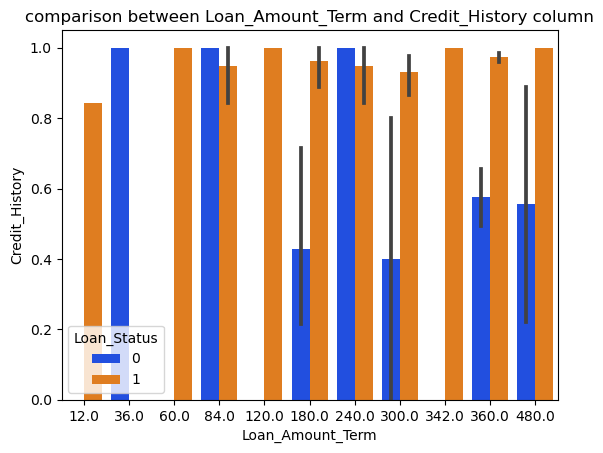

In [62]:
#Comparing Loan_Amount_Term and Credit_History column

plt.title("comparison between Loan_Amount_Term and Credit_History column")
sns.barplot(x='Loan_Amount_Term', y ='Credit_History', data =df, hue = 'Loan_Status', palette ='bright')

plt.show()

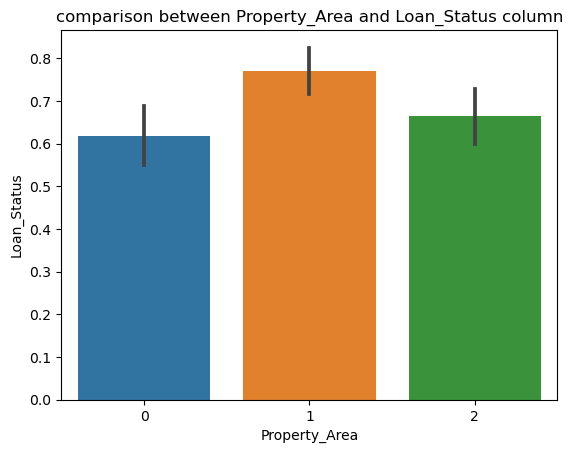

In [63]:
#Comparing Property_Area and Loan_Status column

plt.title("comparison between Property_Area and Loan_Status column")
sns.barplot(x='Property_Area', y ='Loan_Status', data =df)

plt.show()

In [64]:
df.shape

(589, 12)

In [65]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [66]:
# Now we need to split the data using Train and Test method. 
# We have to split the data and perform training and testing in 80:20 ration

#Splitting the data into x and y

x = df.iloc[:, 0:11].values
y = df.iloc[: ,11].values

In [67]:
x

array([[  1.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]])

In [68]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

In [69]:
#Splitting the data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size =0.20, random_state =0)

In [70]:
x_train.shape, x_test.shape

((471, 11), (118, 11))

In [71]:
y_train.shape, y_test.shape

((471,), (118,))

In [72]:
#Applying ML models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

def models(x_train,y_train):
    RFC = RandomForestClassifier(n_estimators =15, criterion='entropy', random_state =0)
    RFC.fit(x_train,y_train)
    predRFC = RFC.predict(x_test)
    print("RandomForestClassifier training Accuracy: ", RFC.score(x_train, y_train))

    
    DTC = DecisionTreeClassifier(criterion='entropy', random_state =0)
    DTC.fit(x_train,y_train)
    print("DecisionTreeClassifier training Accuracy: ", DTC.score(x_train, y_train))
    
    Knn = KNeighborsClassifier(n_neighbors=10, metric = 'minkowski',p=2)
    Knn.fit(x_train,y_train)
    print("KNeighborsClassifier training Accuracy: ", Knn.score(x_train, y_train))
    
    LR = LogisticRegression(random_state =0)
    LR.fit(x_train,y_train)
    print("LogisticRegressio training Accuracy: ", LR.score(x_train, y_train))
    
    svc = SVC(kernel='linear',random_state =0)
    svc.fit(x_train,y_train)
    print("SVC training Accuracy: ", svc.score(x_train, y_train))
    
    GNB = GaussianNB(priors=None, var_smoothing=1e-09)
    GNB.fit(x_train,y_train)
    print("GausssianNB training Accuracy: ", GNB.score(x_train, y_train))
    
    
    return RFC, DTC, Knn, LR, svc, GNB

In [73]:
model = models(x_train,y_train)

RandomForestClassifier training Accuracy:  0.9893842887473461
DecisionTreeClassifier training Accuracy:  1.0
KNeighborsClassifier training Accuracy:  0.7048832271762208
LogisticRegressio training Accuracy:  0.8259023354564756
SVC training Accuracy:  0.8174097664543525
GausssianNB training Accuracy:  0.8280254777070064


DTC is having good accuracy score. So lets use DTC to predict the target value

In [74]:
#Lets check Confusion Matrix for all the models

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))
    
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    test_score = (TP+TN)/(TP+TN+FN+FP)
    
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i,test_score))
    print()

[[13 25]
 [ 5 75]]
Model[0] Testing Accuracy = "0.7457627118644068"

[[18 20]
 [13 67]]
Model[1] Testing Accuracy = "0.7203389830508474"

[[10 28]
 [18 62]]
Model[2] Testing Accuracy = "0.6101694915254238"

[[10 28]
 [ 1 79]]
Model[3] Testing Accuracy = "0.7542372881355932"

[[ 9 29]
 [ 0 80]]
Model[4] Testing Accuracy = "0.7542372881355932"

[[11 27]
 [ 2 78]]
Model[5] Testing Accuracy = "0.7542372881355932"



In [75]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)



DecisionTreeClassifier()

In [76]:
predDTC = DTC.predict(x_test)
predDTC

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0])

In [77]:
#Saving the model

import pickle
filename ='pickledtcfile.pkl'
pickle.dump(DTC, open(filename,'wb'))

In [78]:
# Loading the model

loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0])

In [79]:
#As DTC is having good accuracy score. We will do some prediction with rondom values.
import numpy as np
Loan_Status  = np.array([1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2])
Loan_Status

array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.84900000e+03, 0.00000000e+00, 1.46412162e+02,
       3.60000000e+02, 1.00000000e+00, 2.00000000e+00])

In [80]:
Loan_Status.shape

(11,)

In [81]:
Loan_Status= Loan_Status.reshape(1,-1)

In [82]:
Loan_Status.shape

(1, 11)

In [83]:
predvalue =DTC.predict(Loan_Status)
predvalue

array([1])